In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

#sns.set()

In [ ]:
df_b = pd.read_csv("GL_MBO_SVM_RandomForest_MNIST_unbalanced_2N.csv").rename(columns={"N":"|X0|"})
df_x = df_b.iloc[:,[1,2,3,4,5]].sort_values(["|X0|"]).reset_index().drop(["index"], axis=1)
df_x.iloc[:,[1,2,3,4]] = round(df_x.iloc[:,[1,2,3,4]] * 100.0,2).astype(str) + "%"
df_x

In [ ]:
df_plot = df_b.melt(id_vars="|X0|", value_name="Accuracy", value_vars=["GL", "MBO", "SVM","RandomForest"])
sns.lineplot(data=df_plot, x="|X0|", y="Accuracy", hue="variable")

In [ ]:
df_b = pd.read_csv("GL_MBO_SVM_RandomForest_MNIST.csv")
# df_b.iloc[:,[4,1,2,3,5]].sort_values(["|X0|"]).reset_index().drop(["index"], axis=1)

## Validasi Analisis

In [ ]:
import numpy as np
import scipy as sc

In [100]:
def compare_mean(z, sigma, mean, cov, sample=100000):
    X = np.random.multivariate_normal(mean, cov, sample)
    f = lambda x: np.exp(-np.einsum('ij,ij->i', x-z, x-z)/(2*(sigma**2)))

    m = len(mean)
    I = np.identity(len(mean))
    det_cov = np.linalg.det(cov)
    det_denum = np.linalg.det(I*(sigma**2) + cov)
    sig_2m = sigma**(2*m)
    covv_inv = np.linalg.inv(I*(sigma**2) + cov)
    mean_fx = np.sqrt(sig_2m/det_denum) * np.exp(-0.5*(z-mean).T.dot(covv_inv).dot(z-mean))
    
    print("Teorethical \t\t: ", mean_fx)
    print("From Sample (N={})\t: ".format(sample), np.mean(f(X)))

In [101]:
cov = np.array([
    [1/10, 0, 0],
    [0, 1/5, 0],
    [0, 0, 1/7]
])
mean = np.array([2,3,2])
z = np.array([1,1,1])
sigma = 2

compare_mean(z, sigma, mean, cov)

Teorethical 		:  0.46157145767458346
From Sample (N=100000)	:  0.4612511785376827


In [54]:
?np.linalg.det

In [50]:
I = np.identity(len(mean))
I*(sigma**2) + cov

array([[1.1       , 0.        , 0.        ],
       [0.        , 1.2       , 0.        ],
       [0.        , 0.        , 1.14285714]])

In [ ]:
cov = np.array([
    [1/7, 0],
    [0, 1/7]
])
mean = np.array([0,3])
z = np.array([0,0])
sigma = 3

compare_mean(z, sigma, mean, cov)

In [2]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = [10, 5]

(-3.0, 5.0, -2.0, 3.0)

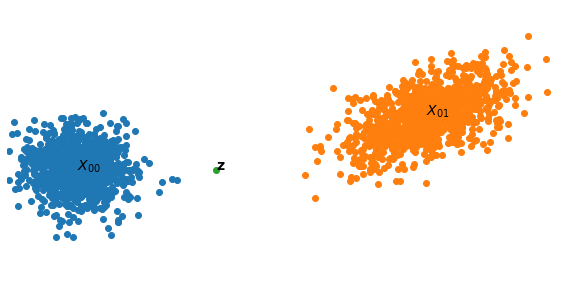

In [21]:
cov = np.array([
    [1/7, 0],
    [0, 1/7]
])

cov2 = np.array([
    [1/3, 1/7],
    [1/7, 1/5]
])

mean1 = np.array([-2,0])
mean2 = np.array([3,1])
z = np.array([0,0])
sigma = 3

X00 = np.random.multivariate_normal(mean1, cov, 1000)
X01 = np.random.multivariate_normal(mean2, cov2, 1000)

plt.scatter(X00[:,0], X00[:,1], label="$X_{00}$")
plt.scatter(X01[:,0], X01[:,1], label="$X_{01}$")
plt.scatter([z[0]], [z[1]])
plt.ylim([-2, 3])
plt.xlim([-3, 5])
plt.annotate("z", (0,0), fontsize=14, fontweight="bold")
plt.annotate("$X_{00}$", mean1, fontsize=14, fontweight="bold")
plt.annotate("$X_{01}$", mean2, fontsize=14, fontweight="bold")
plt.axis("off")